In [1]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
file = Path('crypto_data.csv')

In [3]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
# List all algorithms in use
algor = set(df.Algorithm.values)
print(algor)


{'YescryptR16', 'Equihash1927', 'TRC10', 'HybridScryptHash256', 'Exosis', 'PHI1612', 'Slatechain', 'vDPOS', 'SHA3', 'Proof-of-Authority', 'Tribus', 'Stanford Folding', 'Scrypt', 'PoS', 'CryptoNight-V7', '1GB AES Pattern Search', 'Skein', 'VeChainThor Authority', 'Dagger-Hashimoto', 'CryptoNight-lite', 'Equihash+Scrypt', 'DPoS', 'CryptoNight Heavy', 'SHA-256 + Hive', 'CryptoNight Heavy X', 'Lyra2Z', 'X11', 'Leased POS', 'POS 2.0', 'Time Travel', 'Argon2d', 'C11', 'QUAIT', 'Quark', 'SkunkHash v2 Raptor', 'Keccak', 'Progressive-n', 'PHI2', 'Blake2S', 'Shabal256', 'Proof-of-BibleHash', 'Wild Keccak', 'VBFT', 'Green Protocol', 'Argon2', 'X13', 'Semux BFT consensus', 'X14', 'Lyra2RE', 'XG Hash', 'Equihash', 'SkunkHash', 'XEVAN', 'IMesh', 'X15', 'Cryptonight-GPU', 'Curve25519', 'Avesta hash', '536', 'X16S', 'Blake2b', 'M7 POW', 'Rainforest', 'SHA-512', 'Blake', 'CryptoNight-Lite', 'Ethash', 'SHA-256D', 'Jump Consistent Hash', 'X11GOST', 'Ouroboros', 'NeoScrypt', 'BLAKE256', 'Zhash', 'SHA3-256

In [5]:
# print the counts of stocks being currently traded vs. not being currently traded 
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# Select only cryptocurrencies that are being traded
df = df.loc[df['IsTrading']==True]
df['IsTrading'].value_counts()


True    1144
Name: IsTrading, dtype: int64

In [7]:
# Delete the IsTrading column; it is no longer necessary
df = df.drop("IsTrading", axis=1)
df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Delete all rows with null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [9]:
# Sort values in TotalCoinsMined to identify negative or zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [10]:
# Select only rows with positive TotalCoinsMined values
df = df[df["TotalCoinsMined"] >0]
len(df)

532

In [11]:
# Delete the CoinName column from the original dataframe
df=df.drop('CoinName', axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Create dummy variables for columns with string values
k = pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(k.shape)
k

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Standardize the data
scaler = StandardScaler()
k_scaled = scaler.fit_transform(k)

In [14]:
# print the scaled data
k_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [15]:
# Identify the numbers of rows and columns in the scaled data
k_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [16]:
# Reduce dimensions with PCA
pca = PCA(n_components=0.90)
prin_components = pca.fit_transform(k_scaled)
prin_components.shape

(532, 74)

In [17]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.4728345756615

In [18]:
# Reduce dimensions with t-SNE
tsneX=TSNE(perplexity=50)
tsneXFeat = tsneX.fit_transform(prin_components)
tsneXFeat.shape

(532, 2)

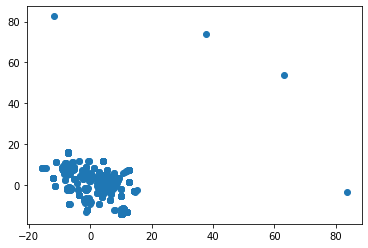

In [19]:
# Plot t-SNE output
x = tsneXFeat[:,0]
y = tsneXFeat[:,1]

plt.scatter(x, y)
plt.show()

In [20]:
# Identify clusters with k-means
inertia = []
kM = [1,2,3,4,5,6,7,8,9,10]

for value in kM:
    kmeans = KMeans(n_clusters=value, random_state=0)
    kmeans.fit(prin_components)
    inertia.append(kmeans.inertia_)

C:\Users\Aether7\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


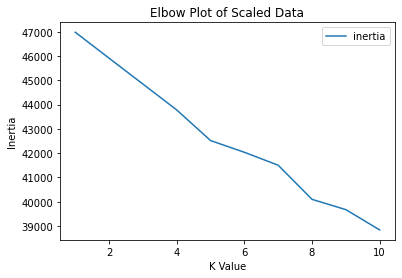

In [23]:
# Create an elbow plot
Eplot = pd.DataFrame({'K':kM, "inertia": inertia})
Eplot.plot.line(x='K', y="inertia")
plt.ylabel("Inertia")
plt.xlabel("K Value")
plt.title("Elbow Plot of Scaled Data")
plt.show()